In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
gold_data.shape

(2290, 6)

In [8]:
gold_data_corr = gold_data.drop(columns='Date',axis=1)

In [9]:
correlation = gold_data_corr.corr()

<Axes: >

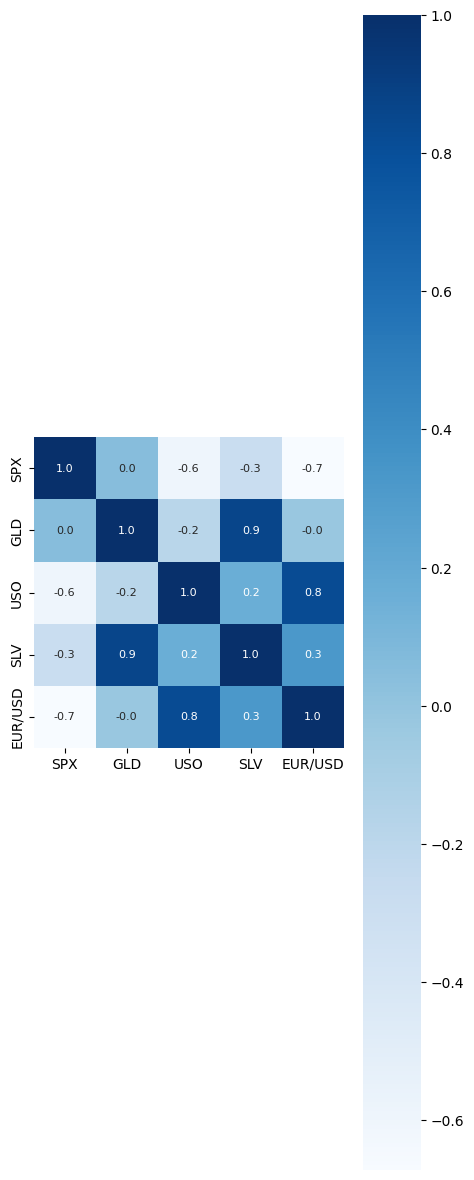

In [12]:
plt.figure(figsize=(5,15))
sns.heatmap(correlation, fmt='0.1f', cbar=True, cmap='Blues', square=True, annot=True, annot_kws={'size':8})

In [13]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

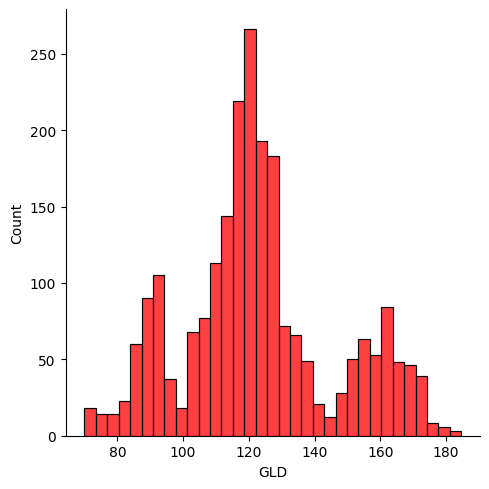

In [14]:
sns.displot(gold_data['GLD'], color='red')

In [16]:
X = gold_data_corr.drop(columns='GLD')
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [17]:
y = gold_data['GLD']
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.1, random_state=2)

In [19]:
model = RandomForestRegressor()

In [20]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_pred = model.predict(X_train)

Text(0, 0.5, 'predicted price')

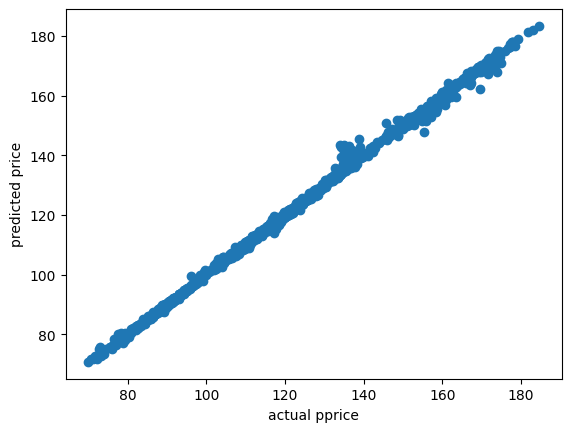

In [22]:
plt.scatter(x= y_train, y= y_pred)
plt.xlabel('actual pprice')
plt.ylabel('predicted price')

In [24]:
error_score = sklearn.metrics.r2_score(y_train, y_pred)
error_score

0.9984717469712471

In [25]:
y_pred_test = model.predict(X_test)

Text(0, 0.5, 'predicted price')

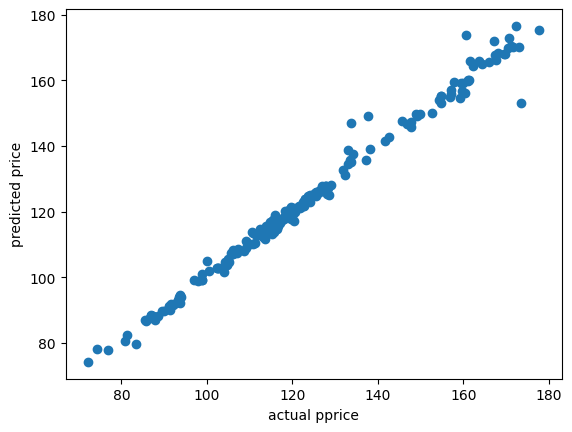

In [26]:
plt.scatter(x= y_test, y= y_pred_test)
plt.xlabel('actual pprice')
plt.ylabel('predicted price')

In [27]:
error_score = sklearn.metrics.r2_score(y_test, y_pred_test)
error_score

0.9887756853851578

In [28]:
from xgboost import XGBRegressor

In [29]:
model = XGBRegressor()

In [30]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred = model.predict(X_train)

Text(0, 0.5, 'predicted price')

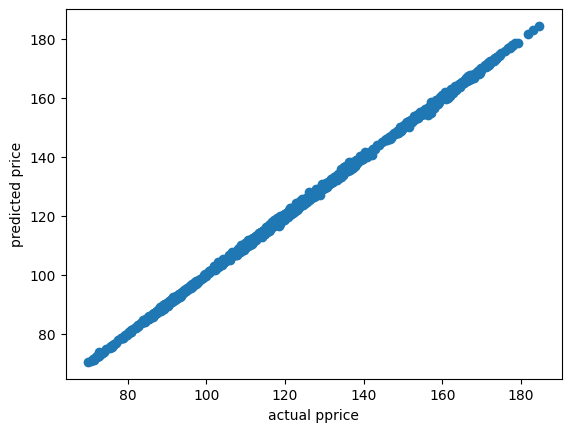

In [32]:
plt.scatter(x= y_train, y= y_pred)
plt.xlabel('actual pprice')
plt.ylabel('predicted price')

In [33]:
error_score = sklearn.metrics.r2_score(y_train, y_pred)
error_score

0.9996638154590036